In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [9]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    gram=np.dot(np.transpose(tx),tx)
    w=np.dot(np.dot(np.linalg.inv(gram),np.transpose(tx)),y)
    e=y-np.dot(tx,w)
    mse=np.linalg.norm(e)**2
    mse=mse/(2*len(y))
    return mse,w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [13]:
from helpers import *
#from grid_search import generate_w, get_best_parameters
#from plots import grid_visualization
import datetime


def test_your_least_squares():
    #generation of the data 
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    ##from td 2
    # Generate the grid of parameters to be swept
    #grid_w0, grid_w1 = generate_w(num_intervals=150)

    # Start the grid search
    #start_time = datetime.datetime.now()
    #grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    #loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    #end_time = datetime.datetime.now()
    #execution_time = (end_time - start_time).total_seconds()

    # Print the results
    #print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
    #      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))
    
    #then results of analytic least squares
    #start_time2 = datetime.datetime.now()
    mse,wls=least_squares(y, tx)
    print(wls)
    print(mse)
    #end_time2 = datetime.datetime.now()
    #execution_time2 = (end_time2 - start_time2).total_seconds()
    #print("analytic least square : loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.6f} seconds".format(
    #      l=mse, w0=wls[0], w1=wls[0],t=execution_time2))

test_your_least_squares()

[ 73.293922    13.47971243]
15.3858878688


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [31]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [32]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    phi=np.zeros((x.shape[0],degree+1))
    for i in range(x.shape[0]):
        for j in range (degree+1):
            phi[i,j]=x[i]**j
    return phi 

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907202
Processing 4th experiment, degree=12, rmse=1.3106193798124994


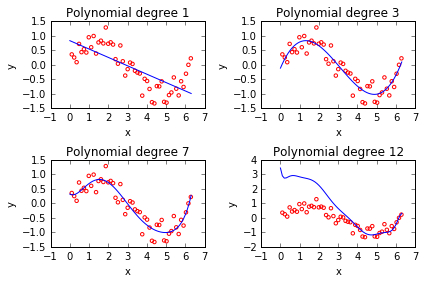

In [33]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        #constructing the polynomial transformation of the data for this degree bound
        phi=build_poly(x, degree)
        #debug : print phi
        #print("shape of phi : ", phi.shape)
        # least square and calculate rmse: TODO
        mse,weight=least_squares(y, phi)
        rmse=(2*mse)**(0.5)
        # debug print("weight : ", weight)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [34]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # split the data based on the given ratio: TODO
    indices=np.arange(x.shape[0])
    np.random.shuffle(indices)
    
    #upperbound for the ratio : 
    up=int(ratio * x.shape[0])
    #creation of the data sets
    xtrain=x[indices[0:up]]
    xtest=x[indices[up:]]
    ytrain=y[indices[0:up]]
    ytest=y[indices[up:]]
    #returning the result
    return xtrain,xtest,ytrain,ytest

#testing the function : OK
ratio=0.2
xtrain,xtest,ytrain,ytest=split_data(x, y, ratio)
print("x = ", x)
print("xtrain = ", xtrain)
print(x.shape)



x =  [ 0.35237491  4.8951233   1.86662437  3.50706129  3.38087384  0.73093728
  3.88562366  5.65224803  6.28318531  2.37137419  0.60474982  3.63324875
  0.85712473  2.49756165  1.61424946  5.39987312  6.15699785  6.0308104
  0.47856237  2.87612401  4.51656093  0.98331219  1.10949964  0.1
  2.11899928  1.36187455  4.01181111  5.77843549  4.26418602  1.2356871
  2.24518674  1.99281183  1.48806201  4.64274839  4.39037348  3.00231147
  0.22618746  5.27368567  5.02131076  5.52606058  2.6237491   4.76893584
  3.12849893  1.74043692  3.7594362   3.25468638  5.90462294  4.13799857
  2.74993656  5.14749821]
xtrain =  [ 5.77843549  3.00231147  2.6237491   5.02131076  1.86662437  3.50706129
  2.74993656  1.2356871   5.90462294  1.99281183]
(50,)


Then, test your `split_data` function below.

In [35]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    #split the datas and return the data sets
    xtrain,xtest,ytrain,ytest=split_data(x, y, ratio)
    # ***************************************************
    #transform the data set through polynomial basis
    phitrain= build_poly(xtrain, degree)
    phitest= build_poly(xtest, degree)
    # ***************************************************
    #train the model on training set
    mse_tr,w= least_squares(ytrain, phitrain)
    # ***************************************************
    #compute the rmse of the training
    rmse_tr= (2*mse_tr)**(0.5)
    #compute the rmse for the test data
    mse_te= compute_loss(ytest, phitest, w)
    rmse_te=(2*mse_te)**(0.5)
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=6.898, Testing RMSE=4.588
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=1.097, Testing RMSE=1.276
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=1.375, Testing RMSE=2.094
proportion=0.1, degree=12, Training RMSE=5.416, Testing RMSE=67.334


# Ridge Regression
Please fill in the function below.

In [36]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # analytical solution
    gram= np.dot(np.transpose(tx),tx)
    w_ridge= np.dot(np.dot(np.linalg.inv(gram+lamb*np.identity(gram.shape[0])),np.transpose(tx)),y)
    # calculate the error (cost function)
    rr_cost= compute_loss(y,tx,w_ridge)+lamb*(np.linalg.norm(w_ridge)**2)
    # return the cost and the optimal weight
    return rr_cost, w_ridge

#test of the function : lamb= 0 ok same result than least square
#phi=build_poly(x, degree)
#rr_cost,w_ridge= ridge_regression(y,phi,0)
#rmse=(2*rr_cost)**(0.5)
#print(rmse)

[ 5.14749821  2.6237491   5.02131076  0.1         5.65224803  0.35237491
  3.88562366  4.39037348  1.61424946  1.99281183  2.74993656  2.11899928
  2.87612401  3.50706129  4.76893584  4.26418602  1.74043692  2.24518674
  4.13799857  6.0308104   0.98331219  1.2356871   5.52606058  0.47856237
  1.10949964]
[ 3.7594362   5.27368567  0.73093728  1.48806201  5.77843549  5.90462294
  0.85712473  1.86662437  6.28318531  0.22618746  3.38087384  4.64274839
  4.01181111  2.49756165  3.63324875  4.8951233   1.36187455  6.15699785
  3.25468638  5.39987312  3.12849893  4.51656093  3.00231147  2.37137419
  0.60474982]


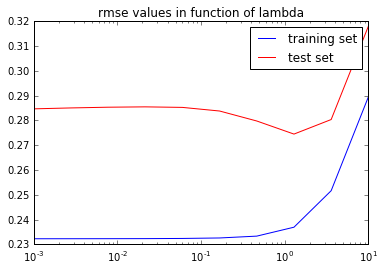

In [40]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    #initializing the cost and lambda vectors
    tr_costs=[]
    te_costs=[]
    lambs=[]
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # split the data 
    xtrain, xtest, ytrain, ytest= split_data(x, y, ratio, seed)
    print(xtrain)
    print(xtest)
    # ***************************************************
    # form train and test data with polynomial basis function
    phitrain= build_poly(xtrain, degree)
    phitest= build_poly(xtest, degree)
    # ***************************************************
    # ridge regression with different lambda: 
    for lamb in lambdas:
        # training the model thanks to the training set
        rr_cost_tr, w_ridge= ridge_regression(ytrain, phitrain, lamb)
        # computing the rmse for the training and test set
        tr_mse= compute_loss(ytrain, phitrain, w_ridge)
        tr_rmse=(2*tr_mse)**(0.5)
        te_mse= compute_loss(ytest, phitest, w_ridge)
        te_rmse=(2*te_mse)**(0.5)
        #saving the costs and lambdas
        tr_costs.append(tr_rmse)
        te_costs.append(te_rmse)
        lambs.append(lamb)
    # ***************************************************
    # plot the results
    z=np.zeros((len(lambs),2))
    z[:,0]=tr_costs
    z[:,1]=te_costs
    p1=plt.plot(lambs,tr_costs,color='b')
    p2=plt.plot(lambs,te_costs,color='r')
    plt.xscale('log')
    plt.legend(["training set", "test set"])
    plt.title("rmse values in function of lambda")
    plt.show()
    
seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [ ]:
[ 0.35237491  4.8951233   1.86662437  3.50706129  3.38087384  0.73093728
  3.88562366  5.65224803  6.28318531  2.37137419  0.60474982  3.63324875
  0.85712473  2.49756165  1.61424946  5.39987312  6.15699785  6.0308104
  0.47856237  2.87612401  4.51656093  0.98331219  1.10949964  0.1
  2.11899928]
6
[ 1.36187455  4.01181111  5.77843549  4.26418602  1.2356871   2.24518674
  1.99281183  1.48806201  4.64274839  4.39037348  3.00231147  0.22618746
  5.27368567  5.02131076  5.52606058  2.6237491   4.76893584  3.12849893
  1.74043692  3.7594362   3.25468638  5.90462294  4.13799857  2.74993656
  5.14749821]